# Visualization dashboard

In [35]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('D:/research-assistant/datasets/final.csv')

## Descriptive Statistics

#### Descriptive statistics are used to describe the basic features of the data in a study. They provide simple summaries about the sample and the measures.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7482 entries, 0 to 7481
Data columns (total 22 columns):
Unnamed: 0    7482 non-null int64
cik           7482 non-null int64
year          7482 non-null int64
size          7482 non-null float64
ni            7482 non-null float64
zscore        7482 non-null float64
leverage      7482 non-null float64
prloss        7482 non-null int64
chgdt         7482 non-null float64
cfo           7482 non-null float64
liquidity     7482 non-null float64
mkbk          7482 non-null float64
litigate      7482 non-null int64
reportlag     7482 non-null int64
priorgc       7482 non-null int64
newequity     7482 non-null float64
newdebt       7482 non-null float64
dependence    7482 non-null float64
indexpert     7482 non-null int64
tenure        7482 non-null float64
big4          7482 non-null int64
bankruptcy    7482 non-null bool
dtypes: bool(1), float64(12), int64(9)
memory usage: 1.2 MB


In [7]:
data[['size', 'ni', 'zscore', 'leverage',
       'prloss', 'chgdt', 'cfo', 'liquidity', 'mkbk', 'litigate', 'reportlag',
       'priorgc', 'newequity', 'newdebt', 'dependence', 'indexpert', 'tenure',
       'big4']].describe()

,size,ni,zscore,leverage,prloss,chgdt,cfo,liquidity,mkbk,litigate,reportlag,priorgc,newequity,newdebt,dependence,indexpert,tenure,big4
count,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000
mean,3.685047,-90.055782,8.749054,2.676403,0.986367,0.031745,-0.767778,0.215944,2.096772,0.311949,147.370890,0.024592,237.127210,0.685205,0.068451,0.056402,0.764291,0.571639
std,2.900512,1030.020129,179.404439,30.737464,0.115968,3.629577,7.745594,0.268391,396.834687,0.463320,120.679081,0.154890,5240.460484,21.000231,0.192192,0.230712,0.284397,0.494874
min,-6.907755,-56121.900000,-5454.832333,0.000000,0.000000,-3.803130,-434.333333,-0.001607,-7541.385965,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000
25%,2.050109,-26.799250,-3.172761,0.263369,1.000000,0.000000,-0.390084,0.020502,0.000000,0.000000,89.000000,0.000000,0.000005,0.000000,0.000000,0.000000,0.693147,0.000000
50%,3.826095,-7.198500,-1.262742,0.609506,1.000000,0.000000,-0.075920,0.093242,0.166591,0.000000,92.000000,0.000000,0.155180,0.000000,0.001066,0.000000,0.693147,1.000000
75%,5.502471,-1.043000,0.687943,0.950832,1.000000,0.000000,0.007086,0.316717,1.786885,1.000000,165.000000,0.000000,1.074652,0.034679,0.026745,0.000000,0.693147,1.000000
max,14.592953,22688.000000,11035.023990,1204.888889,1.000000,313.500000,116.400000,1.000000,24950.200000,1.000000,3025.000000,1.000000,332111.000000,1729.666667,1.000000,1.000000,2.995732,1.000000


## Correlation Matrix

#### Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If the change in opposite directions together (one goes up, one goes down), then they are negatively correlated. You can calculate the correlation between each pair of attributes. This is called a correlation matrix. You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other. This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.

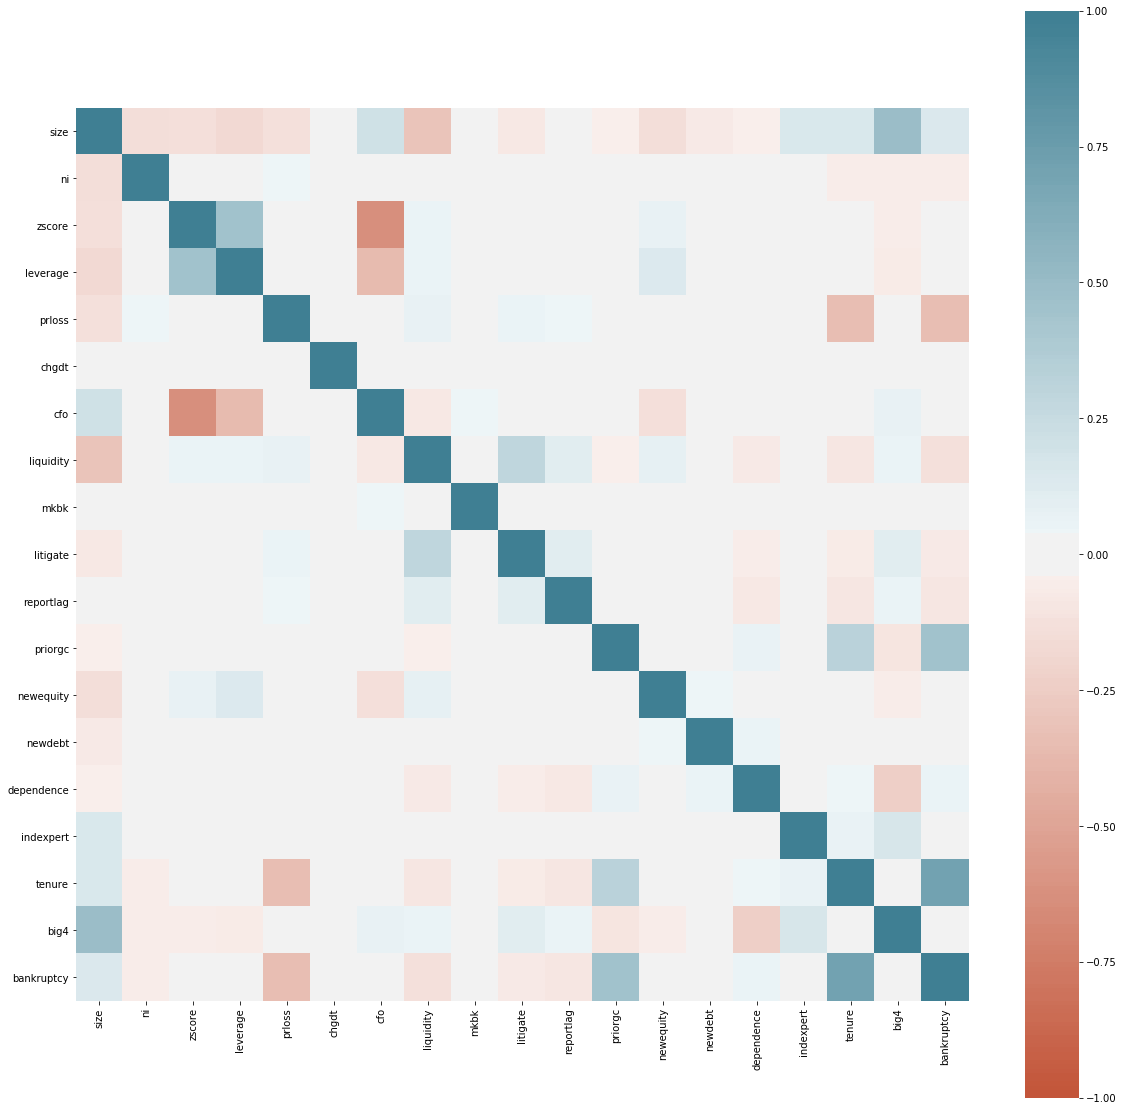

In [47]:
corr = data[['size', 'ni', 'zscore', 'leverage',
       'prloss', 'chgdt', 'cfo', 'liquidity', 'mkbk', 'litigate', 'reportlag',
       'priorgc', 'newequity', 'newdebt', 'dependence', 'indexpert', 'tenure',
       'big4', 'bankruptcy']].corr()
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

## Denisty Plots
#### Density plots are another way of getting a quick idea of the distribution of each attribute. We can see the distribution for each attribute is clearer than the histograms.

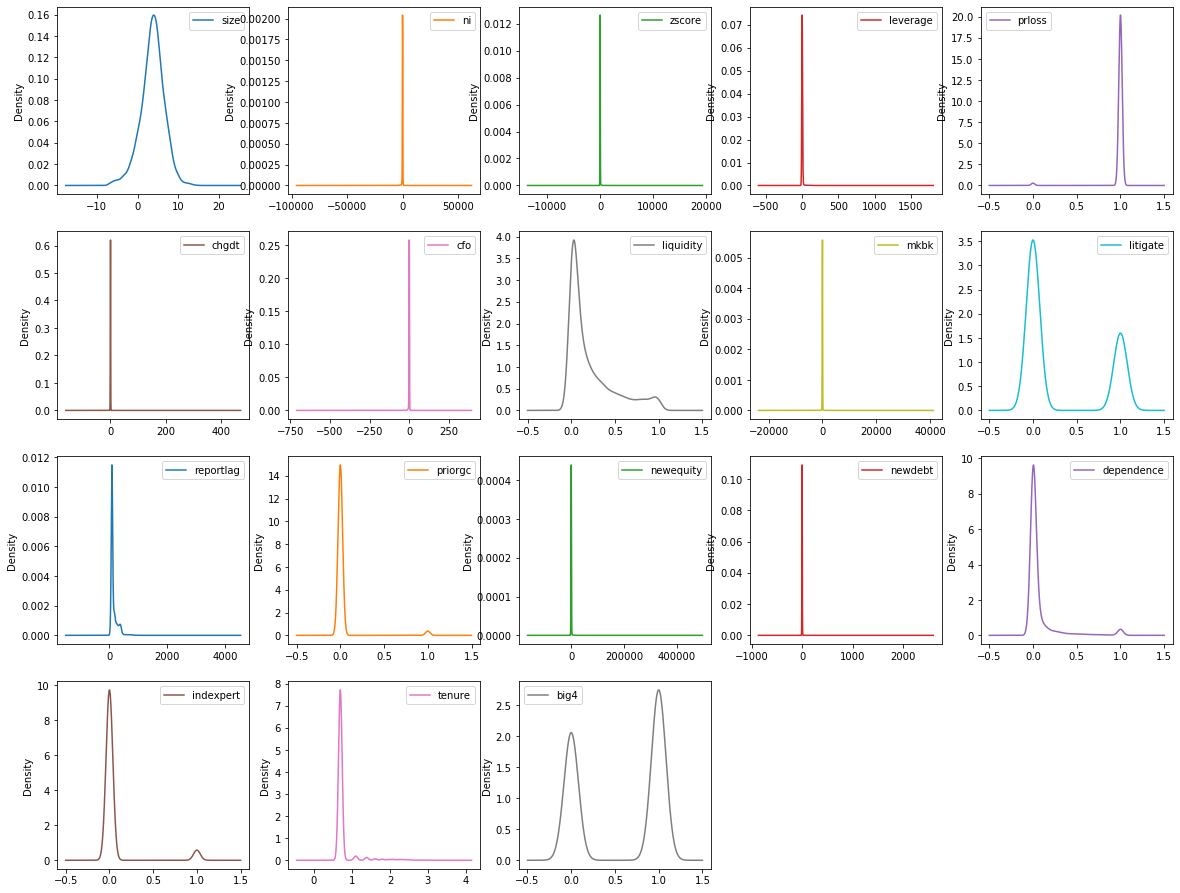

In [86]:
data[['size', 'ni', 'zscore', 'leverage',
       'prloss', 'chgdt', 'cfo', 'liquidity', 'mkbk', 'litigate', 'reportlag',
       'priorgc', 'newequity', 'newdebt', 'dependence', 'indexpert', 'tenure',
       'big4']].plot(kind='density', subplots=True, layout=(5,5), sharex=False, figsize = (20,20))
plt.show()

## Box plots

#### Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

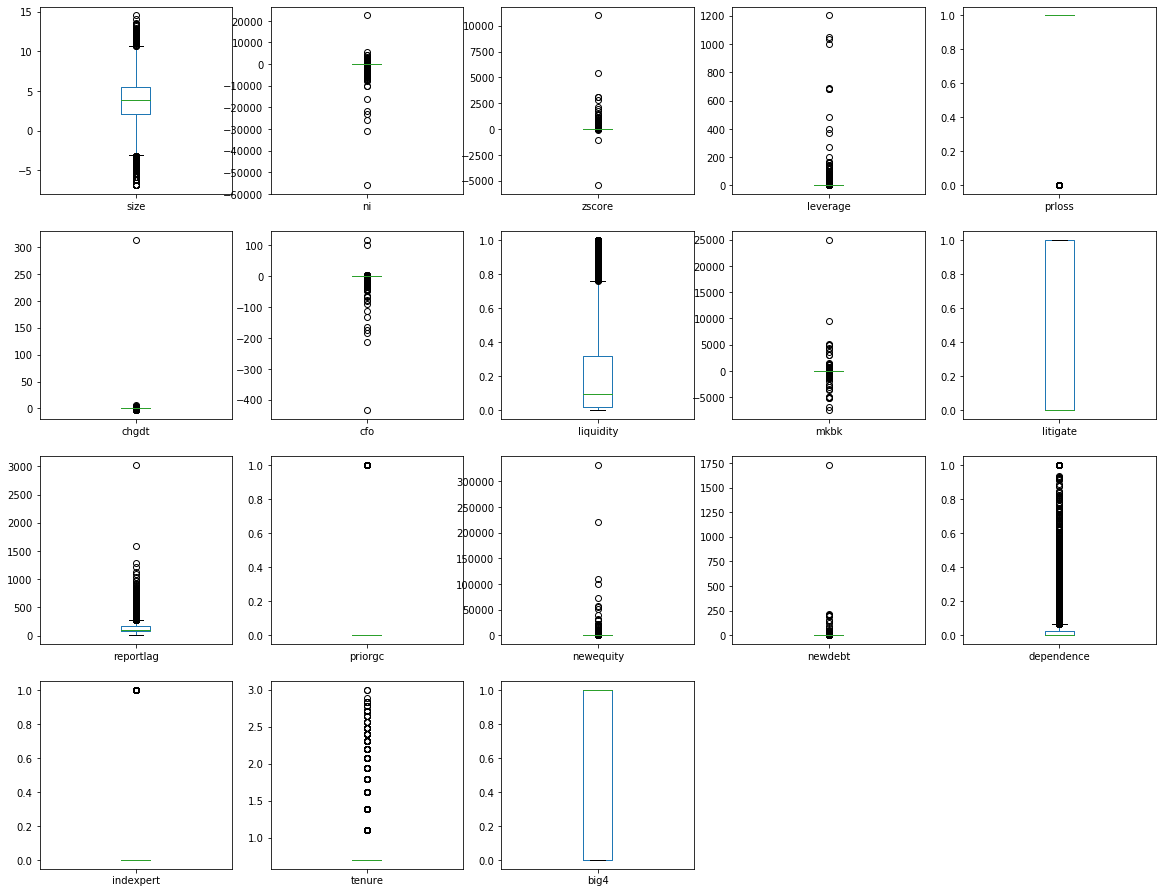

In [34]:
data[['size', 'ni', 'zscore', 'leverage',
       'prloss', 'chgdt', 'cfo', 'liquidity', 'mkbk', 'litigate', 'reportlag',
       'priorgc', 'newequity', 'newdebt', 'dependence', 'indexpert', 'tenure',
       'big4']].plot(kind='box', subplots=True, layout=(5,5), sharex=False, figsize = (20,20))
plt.show()

## Joints plots
### these plots are made based on the correlation matrix, trying to understand the spread between two variables based on high positive/negative correlation.

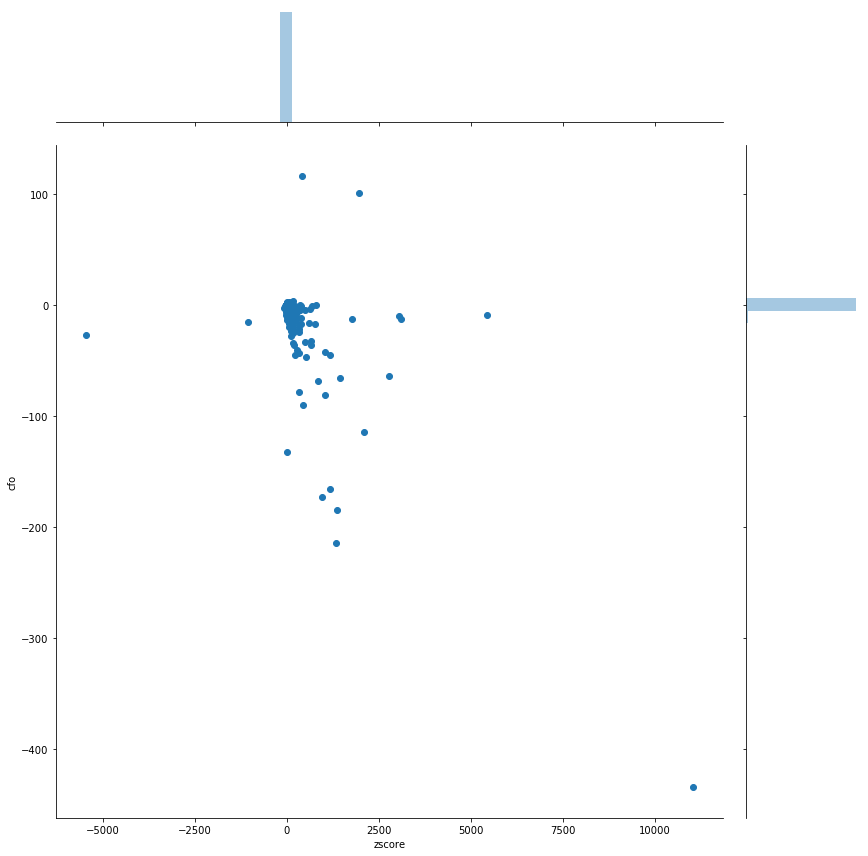

In [50]:
sns.jointplot(data= data, x= 'zscore', y = 'cfo', height = 12)

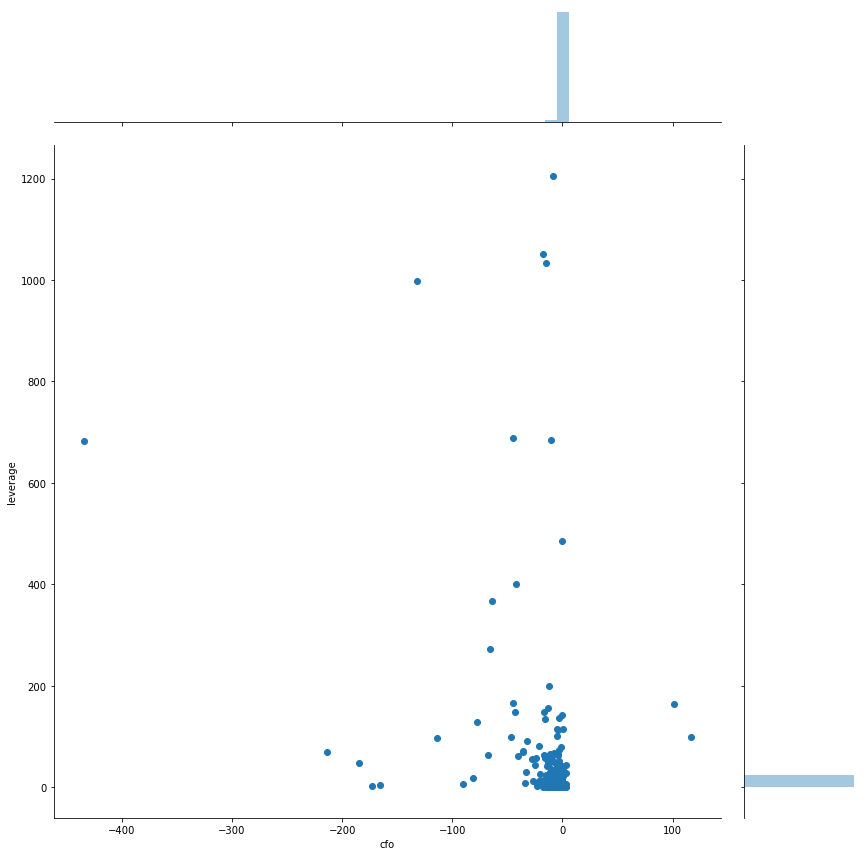

In [57]:
sns.jointplot(data= data, x= 'cfo', y = 'leverage' ,height = 12)

#### This histogram visualizes our data and tells us the number of bankrupt companies over the years in the dataset. as you can see the early 20th century had a lot more companies going bankrupt.

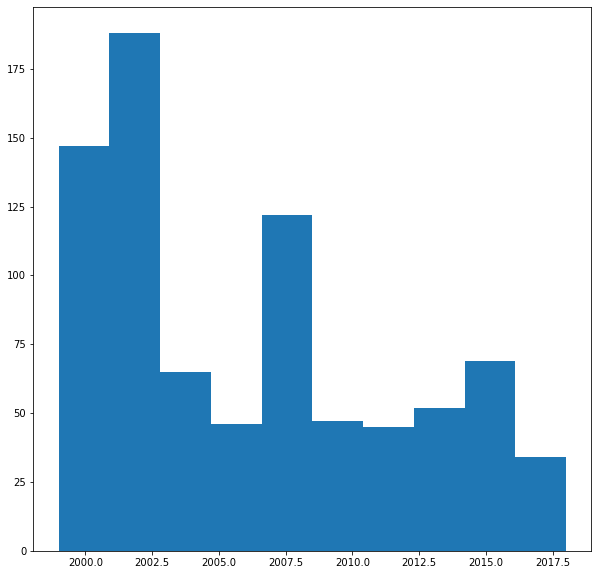

In [80]:
plt.figure(figsize=(10,10))
plt.hist(data[data.bankruptcy == True].year)
plt.show()

#### The above plot can be deceiving as it does not tell us the entire story, the plot below tells us that we have more data on the years 1999 to 2001 and hence more bankrupt companies, this plot shows that the year 2007-2008 had a lot of bankrupt companies.

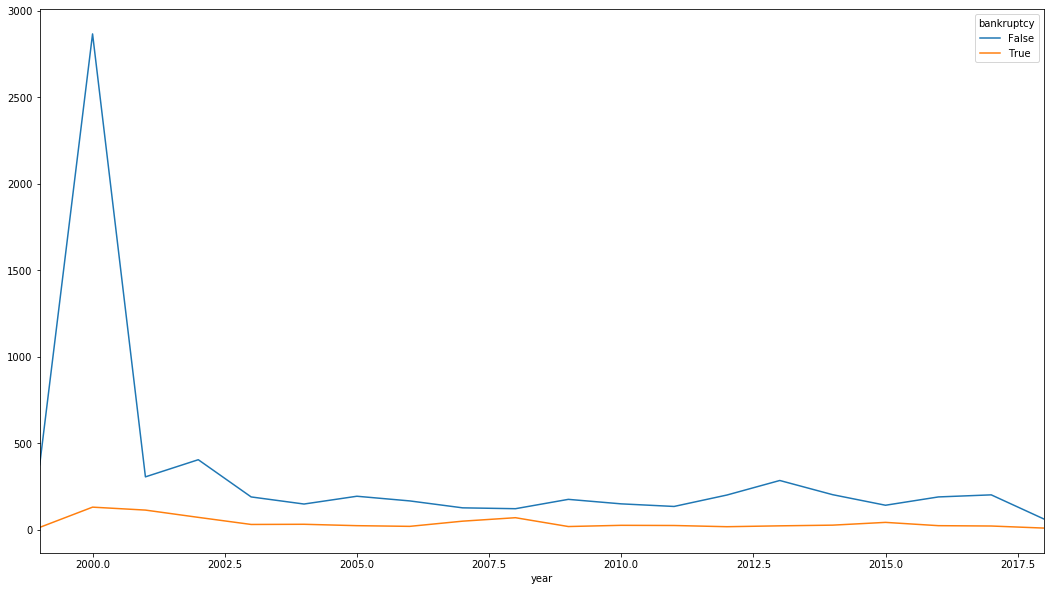

In [81]:
# plot data
fig, ax = plt.subplots(figsize=(18,10))
# use unstack()
data.groupby(['year','bankruptcy']).count()['big4'].unstack().plot(ax=ax)

In [84]:
subset  = data[data.bankruptcy == True]
subset2 = subset[subset.big4 == 1]
subset2 = subset2.groupby(['year','big4']).size()
subset2 = subset2.reset_index(level=[0,1])
#e(subset2)
subset2 = pd.DataFrame(subset2)
subset2 = subset2.rename(columns = {0 :'count'})

#### 

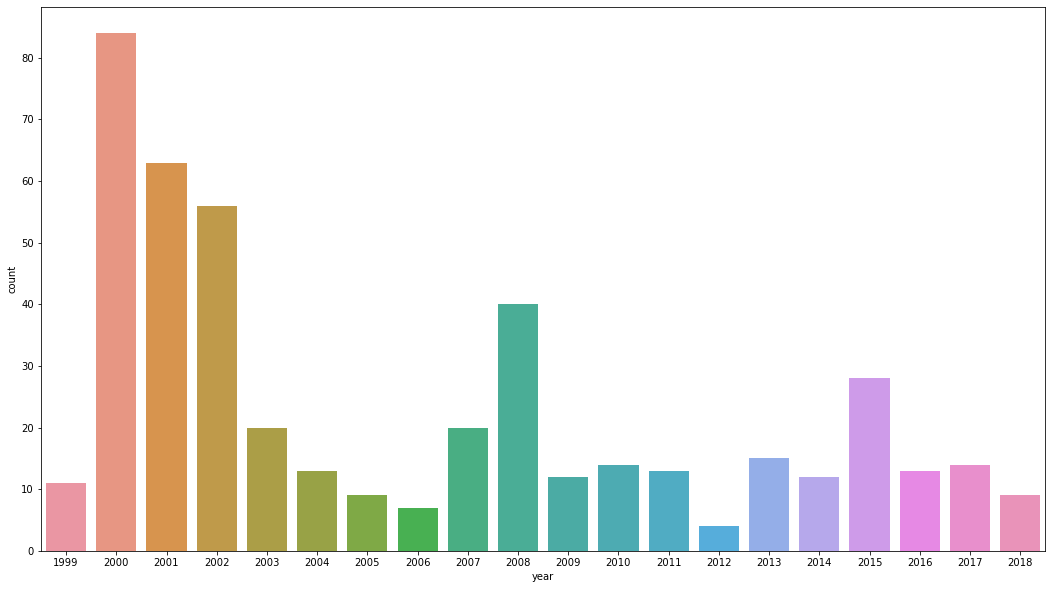

In [83]:
fig, ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(x="year", y="count",  data=subset2)